<a href="https://colab.research.google.com/github/Prince-yori/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%html
<marquee style = 'width:100%; color : blue; '> <b> <h1 style = 'color:SeaGreen; font-family:verdana;'> House Price Prediction</h1></></marquee>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data Acquisiton (Displaying the data)

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/train (3) (1).csv')

In [4]:
data.head()
# head():- will help you to get the top 5 values of the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape
# the shape function tells you about the the shape of your dataset

# we have 1460 rows
# we have 81 columns

(1460, 81)

In [6]:
data.info()

# info(): info function gives us the information about the dataste
#( it tells us about the datatype,null values and number of datas present in our datasset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# But we have to include only those columns whihc has interger and float data types
df = data.select_dtypes(include = ['float64', 'int64'])
df.head()
# Here we are including only those datas which has values in form of numbers or decimal values

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


### Describe our dataset

In [8]:
df.describe().T
# it will tell us about the descriptive stats
# descriptive stats are -> mean, median , mode and count of data, max,min values

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Indentifying missing values


In [9]:
# we have something called isnull()-> this isnull function help us to find all the missing values
mis_val = df.isnull().sum()
mis_val

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:
sort_mis_val = mis_val[mis_val>0].sort_values(ascending = False)
sort_mis_val

# It is giving us all those values whihc is sorted and all the missing values whohc has value grater than 0

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [11]:
# How to fill the data in missing values
columns = ['LotFrontage','GarageYrBlt','MasVnrArea','BsmtHalfBath','GarageArea','GarageCars','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1']

for column in columns:
  df[column] = df[column].fillna(df[column].mean())

In [12]:
df.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [13]:
df.shape

(1460, 38)

In [44]:
# Splitting dataframe into train and test by manulaaly as initially we have two dataframes train and test
df_train = df[:730]
df_test = df[:730]

In [25]:
# Constructing the correlation matrix 
data_corr =df_train.corr()
data_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.063257,-0.068385,-0.000381,0.009516,0.047097,-0.020855,0.017434,-0.032477,0.036216,...,0.037617,-0.006982,0.024694,-0.079135,0.005846,-0.029439,0.007860,0.079210,0.002794,0.015639
MSSubClass,0.063257,1.000000,-0.384499,-0.104290,0.033505,-0.034149,0.013223,0.039662,0.008819,-0.094294,...,-0.010658,0.005419,-0.009557,-0.053679,0.000534,0.015161,-0.017730,0.031151,-0.047653,-0.091207
LotFrontage,-0.068385,-0.384499,1.000000,0.266986,0.268032,-0.107220,0.191831,0.098658,0.220096,0.150316,...,0.112647,0.145017,0.060755,0.088304,0.044964,0.194928,-0.000078,-0.023382,0.006861,0.392293
LotArea,-0.000381,-0.104290,0.266986,1.000000,0.099654,-0.004301,0.015895,0.012585,0.074067,0.217201,...,0.176882,0.064745,-0.019783,0.013864,0.002312,0.041344,0.032531,0.005363,-0.029846,0.261341
OverallQual,0.009516,0.033505,0.268032,0.099654,1.000000,-0.085599,0.556717,0.540103,0.430947,0.257733,...,0.272658,0.320585,-0.116290,0.006157,0.103626,0.049175,-0.030729,0.103950,-0.068105,0.802228
OverallCond,0.047097,-0.034149,-0.107220,-0.004301,-0.085599,1.000000,-0.375807,0.087150,-0.161419,-0.056462,...,-0.003450,-0.040533,0.023269,0.023028,0.058021,-0.052318,0.089016,-0.043543,0.033643,-0.087904
YearBuilt,-0.020855,0.013223,0.191831,0.015895,0.556717,-0.375807,1.000000,0.568110,0.343311,0.297348,...,0.285175,0.215820,-0.383160,0.030556,-0.018106,-0.065187,-0.033092,0.054305,-0.002430,0.535873
YearRemodAdd,0.017434,0.039662,0.098658,0.012585,0.540103,0.087150,0.568110,1.000000,0.198044,0.162178,...,0.227721,0.246952,-0.200018,0.025723,0.013801,0.008293,0.001903,0.040580,0.032532,0.524896
MasVnrArea,-0.032477,0.008819,0.220096,0.074067,0.430947,-0.161419,0.343311,0.198044,1.000000,0.254267,...,0.208743,0.106216,-0.084654,0.007243,0.066337,-0.021809,-0.027255,0.001582,-0.021521,0.479097
BsmtFinSF1,0.036216,-0.094294,0.150316,0.217201,0.257733,-0.056462,0.297348,0.162178,0.254267,1.000000,...,0.268657,0.096678,-0.105430,-0.019432,0.091939,0.047649,-0.000973,0.015288,-0.029923,0.437112


<Axes: >

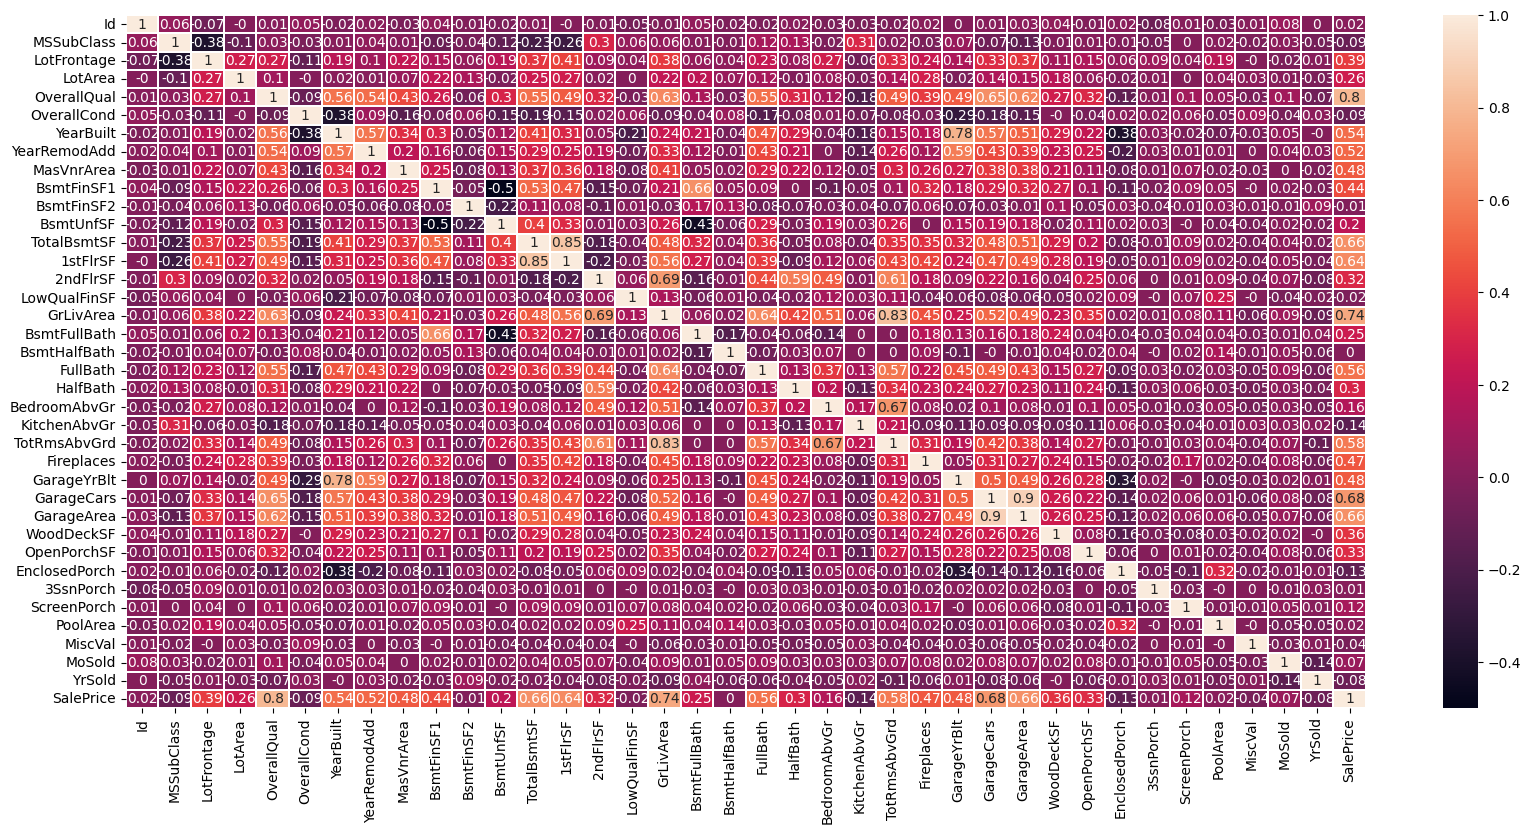

In [16]:
plt.figure(figsize = (20,9))
sns.heatmap(data_corr, annot= True, linewidths = 0.1, linecolor = 'white')

In [21]:
df_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
# we will only considr those feature which abslute corealtion value greater than 60%

data_corr = data_corr['SalePrice'][:-1]
data_corr[abs(data_corr)>=0.60].sort_values(ascending = False)


OverallQual    0.802228
GrLivArea      0.739039
GarageCars     0.676448
GarageArea     0.663418
TotalBsmtSF    0.657199
1stFlrSF       0.643501
Name: SalePrice, dtype: float64

In [45]:
df_train = df_train[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','SalePrice']]
df_test = df_test[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','SalePrice']]

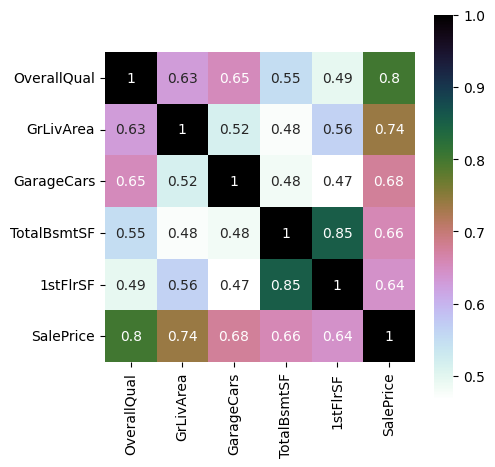

In [29]:
corr = df_train.corr()
plt.figure(figsize = (5,5))
sns.heatmap(corr, annot = True, cmap = 'cubehelix_r',square = True)
plt.show()

In [46]:
# cosider only the highly correlated features for training and validation
train_x = df_train.drop(['SalePrice'], axis = 1)
train_y = df_train['SalePrice']

In [47]:
val_x = df_test.drop(['SalePrice'], axis=1)
val_y = df_test['SalePrice']

In [48]:
print('Dimenssion of train_x', train_x.shape)
print('Dimenssion of train_y', train_y.shape)
print('Dimenssion of val_x', val_x.shape)
print('Dimenssion of val_y', val_y.shape)

Dimenssion of train_x (730, 5)
Dimenssion of train_y (730,)
Dimenssion of val_x (730, 5)
Dimenssion of val_y (730,)


In [50]:
# Linear regression model

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(train_x, train_y)

LinearRegression()

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
df_pred = model1.predict(val_x)
print("mean absolute Error of linear regression:", mean_absolute_error(df_pred, val_y))
print("mean square Error of linear regression:", mean_squared_error(df_pred, val_y))
print("R_Squared Score of linear regression:", r2_score(df_pred, val_y))

mean absolute Error of linear regression: 25667.10703878524
mean square Error of linear regression: 1402977838.4183676
R_Squared Score of linear regression: 0.7348951252991545


In [53]:
# we will regularize our data
# Ridge (L2) Regression
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge()

In [54]:
ridge.fit(train_x,train_y)
ridge_score = ridge.score(val_x,val_y)
coeff_used = np.sum(ridge.coef_ !=0)
ridge.coef_

array([2.25454068e+04, 4.64343775e+01, 1.69102889e+04, 3.35839221e+01,
       1.27942315e+01])

In [55]:
print('Training Score',ridge_score)
print('number of features used:', coeff_used)

Training Score 0.7904480529680014
number of features used: 5


In [56]:
# Lasso(L1) Regresssion
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso

Lasso()

In [58]:
lasso.fit(train_x,train_y)
lasso_score = lasso.score(val_x,val_y)
coeff_used = np.sum(lasso.coef_ !=0)
lasso.coef_

array([2.25630004e+04, 4.63854019e+01, 1.69559487e+04, 3.35311098e+01,
       1.28087027e+01])

In [59]:
print('Traning score',lasso_score)
print("number of features used", coeff_used)

Traning score 0.7904483015465514
number of features used 5
